In [107]:
import pandas as pd
import glob
import os
import seaborn as sns

In [91]:
originalOptions = {"Context": 
                         ["artificial intelligence", "broad-based", "capstone project", "communication skills", "compilers", "cryptography", "data mining", "database", "data structures",  "eBusiness/eCommerce", "ethics/professionalism", "formal methods", "graphics", "groupwork", "hardware/architecture", "human-computer interaction", "information systems", "introduction to IT", "literature",  "logic", "mathematics", "multimedia", "networks", "operating systems", "postgraduate/research", "programming languages", "Programming", "robotics", "school/outreach", "security", "software engineering", "study planning", "systems analysis", "webpage development", "work experience"],
                  "Theme":
                      ["ability/aptitude/understanding", "accessibility", "assessment techniques", "assessment tools", "attitudes", "cheating & plagiarism", "competitions", "credit for prior learning", "curriculum", "educational technology", "ethics/professional issues", "gender issues", "language/culture issues", "online/distance delivery", "recruitment, progression,", "pathways", "research", "teachers", "teaching/learning techniques", "teaching/learning theories & models", "teaching/learning tools", "tutors, demonstrators, mentors"
]
}

newOptions = {"Context": ['service teaching', 'cloud computing', 'data science'],
            "Theme": ['generative AI', 'peer learning/evaluation/feedback'],
}

allOptions = originalOptions

for key, val in newOptions.items():
    allOptions[key] = allOptions[key] + val


allOptions

{'Context': ['artificial intelligence',
  'broad-based',
  'capstone project',
  'communication skills',
  'compilers',
  'cryptography',
  'data mining',
  'database',
  'data structures',
  'eBusiness/eCommerce',
  'ethics/professionalism',
  'formal methods',
  'graphics',
  'groupwork',
  'hardware/architecture',
  'human-computer interaction',
  'information systems',
  'introduction to IT',
  'literature',
  'logic',
  'mathematics',
  'multimedia',
  'networks',
  'operating systems',
  'postgraduate/research',
  'programming languages',
  'Programming',
  'robotics',
  'school/outreach',
  'security',
  'software engineering',
  'study planning',
  'systems analysis',
  'webpage development',
  'work experience',
  'service teaching',
  'cloud computing',
  'data science'],
 'Theme': ['ability/aptitude/understanding',
  'accessibility',
  'assessment techniques',
  'assessment tools',
  'attitudes',
  'cheating & plagiarism',
  'competitions',
  'credit for prior learning',
  '

In [100]:
directory = "revised reviews"
dfs = []
for file in ['CEP paper review form 2019 revised', 
            'CEP paper review form 2020_2022 revised',
            'CEP paper review form 2023_2024 revised',
            'CEP paper review form 2025 revised']:
    print("loading ", file)
    dfs.append(pd.read_excel(os.path.join(directory,file + ".xlsx")))
    
df = pd.concat(dfs)


df.columns = df.columns.str.strip()
#print(df.columns)

#cleaning up and creating Year
df.rename(columns={
    'Who are you': 'Rater',
    'Nature (Simon) see classification details': 'Nature',
    'Context (Simon) see classification details. Use "other" if necessary': 'Context',
    'Theme/topic (Simon) see classification details. Use "other" if necessary': 'Theme',
    'Scope (Simon) see classification details': 'Scope',
    'Title of paper (for cross-checking only)': 'Title',
    'UK institutions contributing data/context, select at least one ("no data/context" is an option, only use if there is absolutely nothing: no module titles, no description of year groups etc). Some institutions are titled "University Of..."': 'Institutions'
}, inplace=True)

df['Year'] = df['Which paper'].astype(str).str[:4]

df = df.drop(columns=['Timestamp',
                      'Rater',
                      'Are you primary or secondary reviewer',
                      'Author emails. One per line',
                      'Section headings, top-level only. One per line',
                      'Number of references in the paper',
                      'Institutions',
                      'C'
                     ])

df

loading  CEP paper review form 2019 revised
loading  CEP paper review form 2020_2022 revised
loading  CEP paper review form 2023_2024 revised
loading  CEP paper review form 2025 revised


,Which paper,Title,Nature,Scope,Context,Theme,revision comments,Notes and queries,Year
0,2019_3294016.3294017,Teaching Data Ethics,Report,Subject,ethics/professionalism,curriculum,NaN,NaN,2019
1,2019_3294016.3294017,Teaching Data Ethics,Report,Subject,ethics/professionalism,curriculum,NaN,NaN,2019
2,2019_3294016.3294018,Computing with Codio at Coventry University,Report,Program/department,Programming,curriculum,keep both,NaN,2019
3,2019_3294016.3294018,Computing with Codio at Coventry University,Report,Program/department,Programming,teaching/learning tools,NaN,NaN,2019
4,2019_3294016.3294019,Nurturing Collaboration in an Undergraduate Co...,Report,Subject,groupwork,teaching/learning techniques,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...
19,2025_3702212.3702223,Assessing Software Engineering Students’ Analy...,Report,Subject,software engineering,generative AI,NaN,NaN,2025
20,2025_3702212.3702224,Where Have All the Papers Gone? Priming the pu...,Position/proposal,Many institutions,broad-based,teachers,NaN,NaN,2025
21,2025_3702212.3702224,Where Have All the Papers Gone? Priming the pu...,Position/proposal,Many institutions,broad-based,teachers,NaN,NaN,2025
22,2025_3702212.3702225,Integrating Socially Responsible Computing Com...,Position/proposal,Many institutions,software engineering,ethics/professional issues,NaN,NaN,2025


In [96]:
papers = df['Which paper'].unique()

problems = {}
for paper in papers:
    paper_problems = {}
    paper_df = df[df['Which paper'] == paper]
    
    review_notes = list(paper_df['revision comments'].dropna().unique())
    
    if len(paper_df) !=2:
        paper_problems['count'] = len(paper_df)
        
    for col_should_be_equal in ['Nature', 'Scope', 'Context', 'Theme']:
        uvs = list(paper_df[col_should_be_equal].unique())
        if len(uvs)> 1 and (not ('keep both' in review_notes)):
            paper_problems[col_should_be_equal + "_mismatch"] = uvs
            
    for col, options in allOptions.items():
        uvs = list(paper_df[col].unique())
        if not (all(x in options for x in uvs)):
            paper_problems[col+"_option"] = uvs        
    
    if len(paper_problems)>0:
        paper_problems['notes'] = review_notes 
        problems[paper] = paper_problems
        
problems

{'2023_3573260.3573261': {'Scope_mismatch': ['Program/department', 'Subject'],
  'notes': []},
 '2024_3633053.3633061': {'Scope_mismatch': ['Program/department', 'Subject'],
  'notes': []},
 '2020_3372356.3372358': {'count': 1, 'notes': []},
 '2020_3372356.3372359': {'count': 1, 'notes': []},
 '2020_3372356.3372362': {'Theme_option': ['accreditation'], 'notes': []},
 '2020_3372356.3372366': {'Theme_option': ['inclusion'],
  'notes': ['new category (broadening of gender_']},
 '2021_3437914.3437971': {'count': 1, 'notes': []}}

In [102]:
df.Theme.unique()

array(['curriculum', 'teaching/learning tools',
       'teaching/learning techniques', 'cheating & plagiarism',
       'ability/aptitude/understanding', 'assessment techniques',
       'recruitment, progression,', 'gender issues',
       'educational technology', 'pathways', 'assessment tools',
       'accreditation', 'inclusion', 'competitions',
       'peer learning/evaluation/feedback', 'teachers',
       'tutors, demonstrators, mentors', 'attitudes', 'generative AI',
       'language/culture issues', 'ethics/professional issues'],
      dtype=object)

In [103]:
df[df.Theme== "gender issues"]

,Which paper,Title,Nature,Scope,Context,Theme,revision comments,Notes and queries,Year
22,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,software engineering,gender issues,keep both,NaN,2019
23,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,groupwork,gender issues,keep both,NaN,2019
53,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,gender issues,NaN,topic-arguably also assessment techniques,2022
54,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,gender issues,NaN,NaN,2022


In [106]:
df.loc[df.Theme == "gender issues", 'Theme'] = "inclusion"
df[df.Theme=="inclusion"]

,Which paper,Title,Nature,Scope,Context,Theme,revision comments,Notes and queries,Year
22,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,software engineering,inclusion,keep both,NaN,2019
23,2019_3294016.3294028,Investigating the Role Choice of Female Studen...,Report,Subject,groupwork,inclusion,keep both,NaN,2019
16,2020_3372356.3372366,Increasing academic diversity and inter-discip...,Report,Program/department,broad-based,inclusion,new category (broadening of gender_,NaN,2020
17,2020_3372356.3372366,Increasing academic diversity and inter-discip...,Report,Program/department,broad-based,inclusion,NaN,"More generally about ""inclusion"" but ""gender"" ...",2020
53,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,inclusion,NaN,topic-arguably also assessment techniques,2022
54,2022_3498343.3498346,Gender parity in peer assessment of team softw...,Report,Subject,groupwork,inclusion,NaN,NaN,2022


In [136]:
all_reviews = len(df)
characteristic_counts = {}
for characteristic in ['Theme', 'Context', 'Scope', 'Nature']:
    df_characteristic_count = df.groupby(characteristic).count().reset_index()
    df_characteristic_count[characteristic + ' (%)'] = 100*df_characteristic_count['Which paper']/all_reviews
    characteristic_counts[characteristic] = df_characteristic_count

<Axes: xlabel='count', ylabel='Theme'>

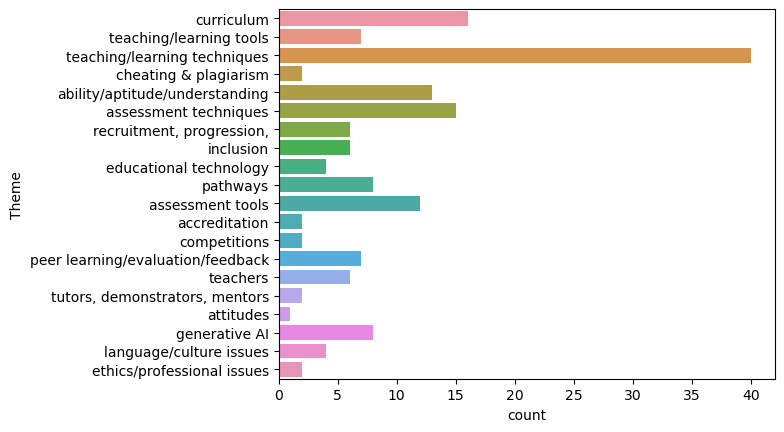

In [137]:
sns.countplot(
    data=df, y="Theme"
)

/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/dcs0spb/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


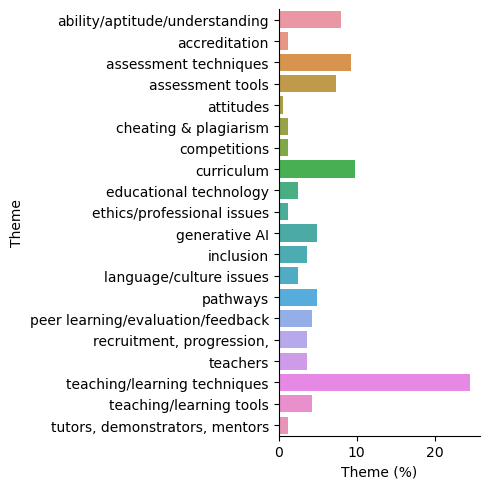

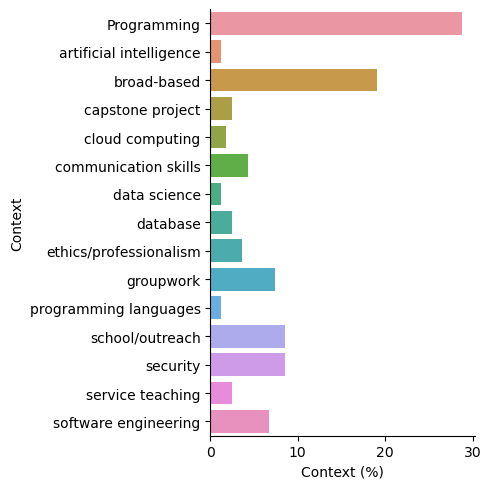

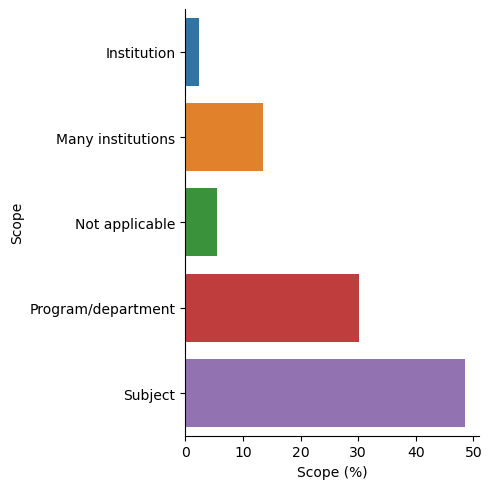

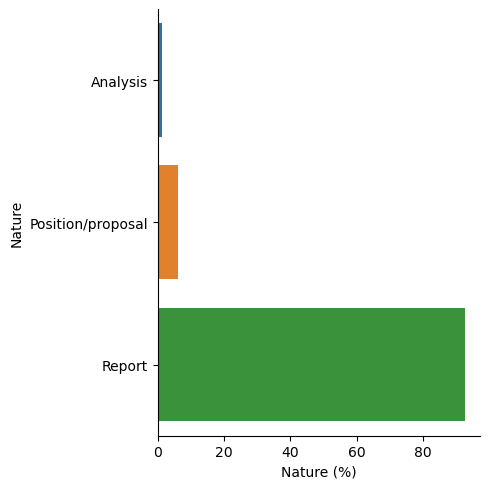

In [139]:
for characteristic in ['Theme', 'Context', 'Scope', 'Nature']:
     sns.catplot(data=characteristic_counts[characteristic],x=characteristic + ' (%)',y=characteristic, kind="bar")